# <font color='navy'> <i><b> STEMFIE-X Brace</i></b> </font>
<img src="./img//demo/banner_02.png" width="800">

Braces are among the basic components of the kit. The library allows the creation of connectors of various sizes and shapes. 
The Brace component is primarily intended for connecting parts, but it can also be used as a structural element for creating slender reinforced structures, such as robot arms, cranes, etc.

<img src="./img/image_brace.png" width="800">

## <font color='purple'> <b> Library classes </b></font>

    Brace(size, height, holes, center)
    Brace_Arc(radius, angle, height, holes, center)
    Brace_Circle(radius, height, holes, center)


### <font color='teal'> <b> Component labeling </b></font>

For better orientation in directories, it is advisable to label the generated components (STL, STEP files) with a name that describes their parameters. Unused and default parameters are not written for clarity.

    brace_t_dd_hh_pp_ss[s]    basic form
    brace_t_dd_hh_pp          abbreviated forms
    brace_t_dd_hh
    brace_t_dd

    t  - brace type                            dd - brace size               hh - brace height
         B - simple brace                           01 ... 99 BU                  01 =    1 BU
         C - circle brace                                                         ...
         A - arc brace                                                            10 =   10 BU
         X - user defined non standard brace                                      12 =  1/2 BU 
                                                                                  14 =  1/4 BU
        
    ss - number of slots                       pp - number of holes if it does not match the size
         00 ... 99                                  00 ... 99

        
    brace_B_dd_hh_pp_ss
        dd - brace size
        pp - number of holes
        ss - number of slots 
        
    brace_C_dd_hh_pp_ss
        dd - brace radius
        hh - brace height     
        pp - number of holes
        ss - number of slots (TODO, not implemented)

    brace_A_dd_hh_pp_sss
        dd  - brace radius
        hh  - brace height, default value is 1/4 BU      
        pp  - number of holes
        sss - brace angle in [deg] 001 ... 180


    Examples
        brace_B_05          -> brace_B_05_14_05_00     standard brace Brace(5)
        brace_B_05_14_00    -> brace_B_05_14_00_00     brace without holes Brace(5, holes=False)

## <font color='purple'> <b> Usage</b></font>

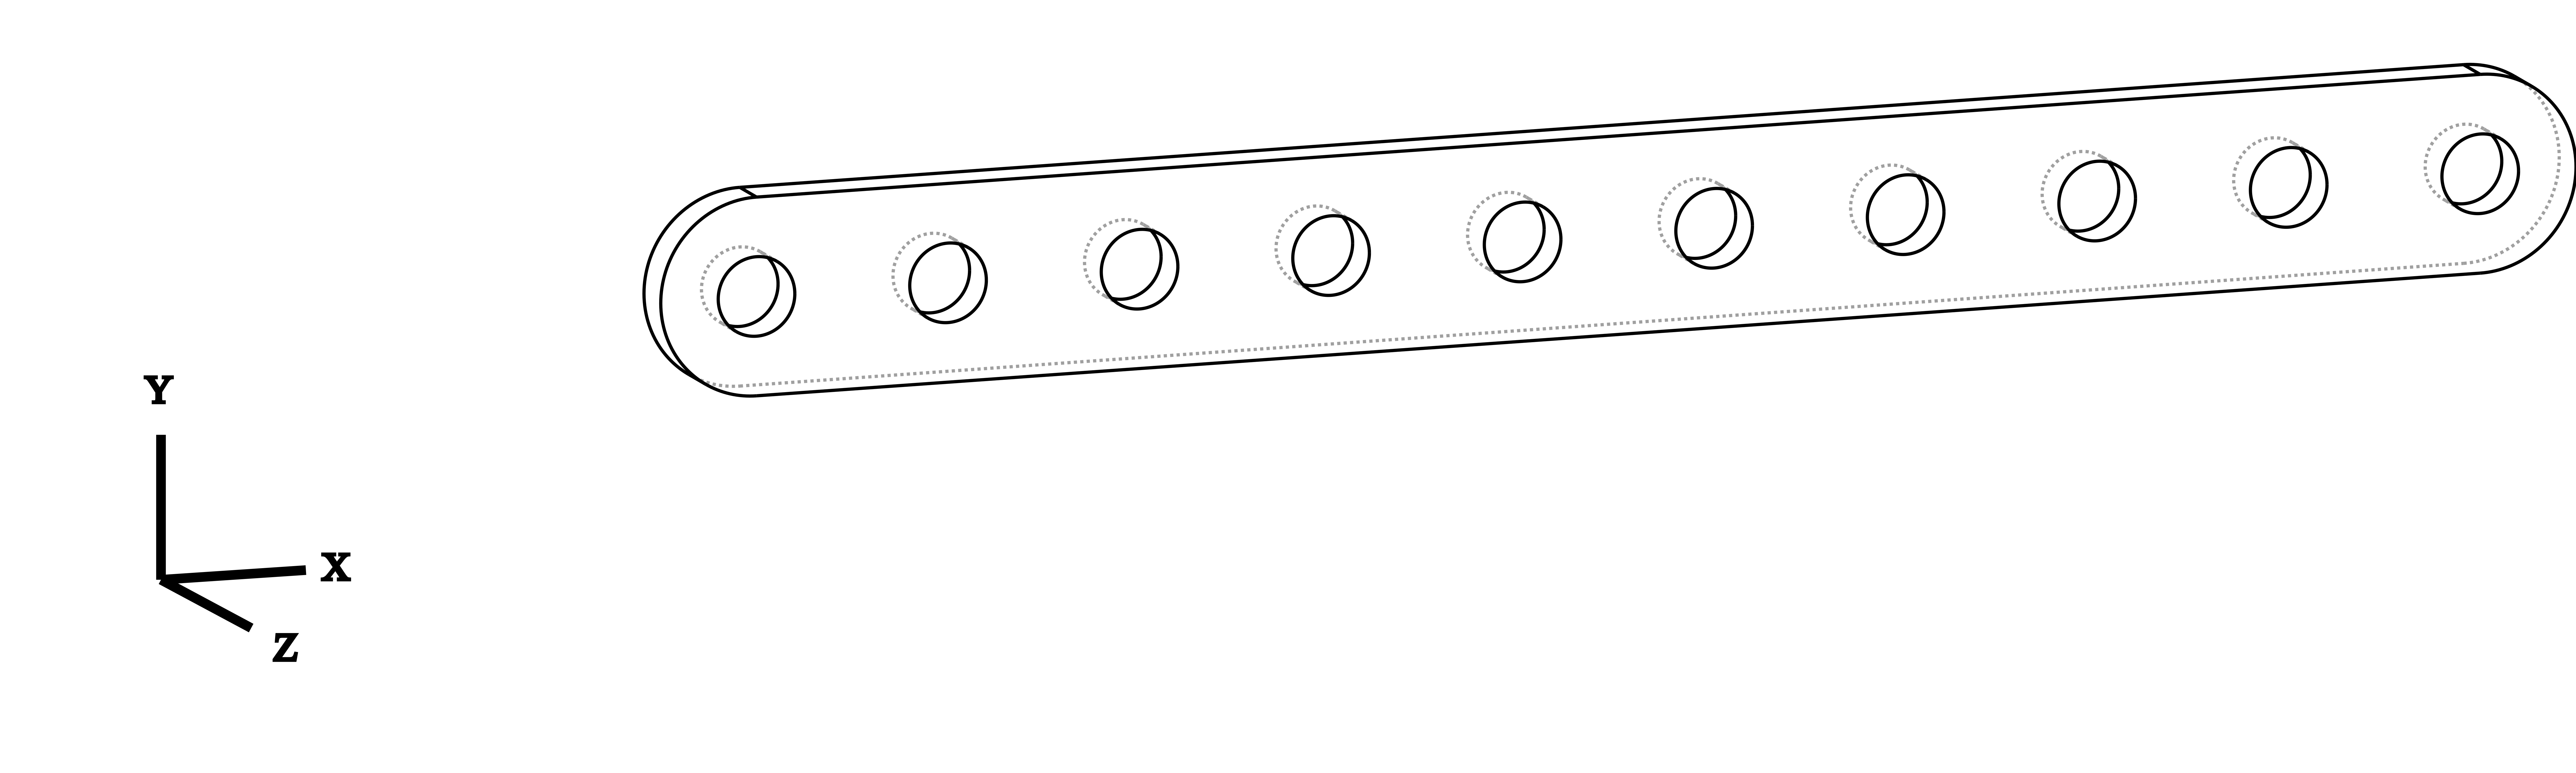

In [1]:
from lib import *
b1 = Brace(10)             # brace_B_10
Image(convert_to_image(b1,'./img/brace_B_10'), width=350)

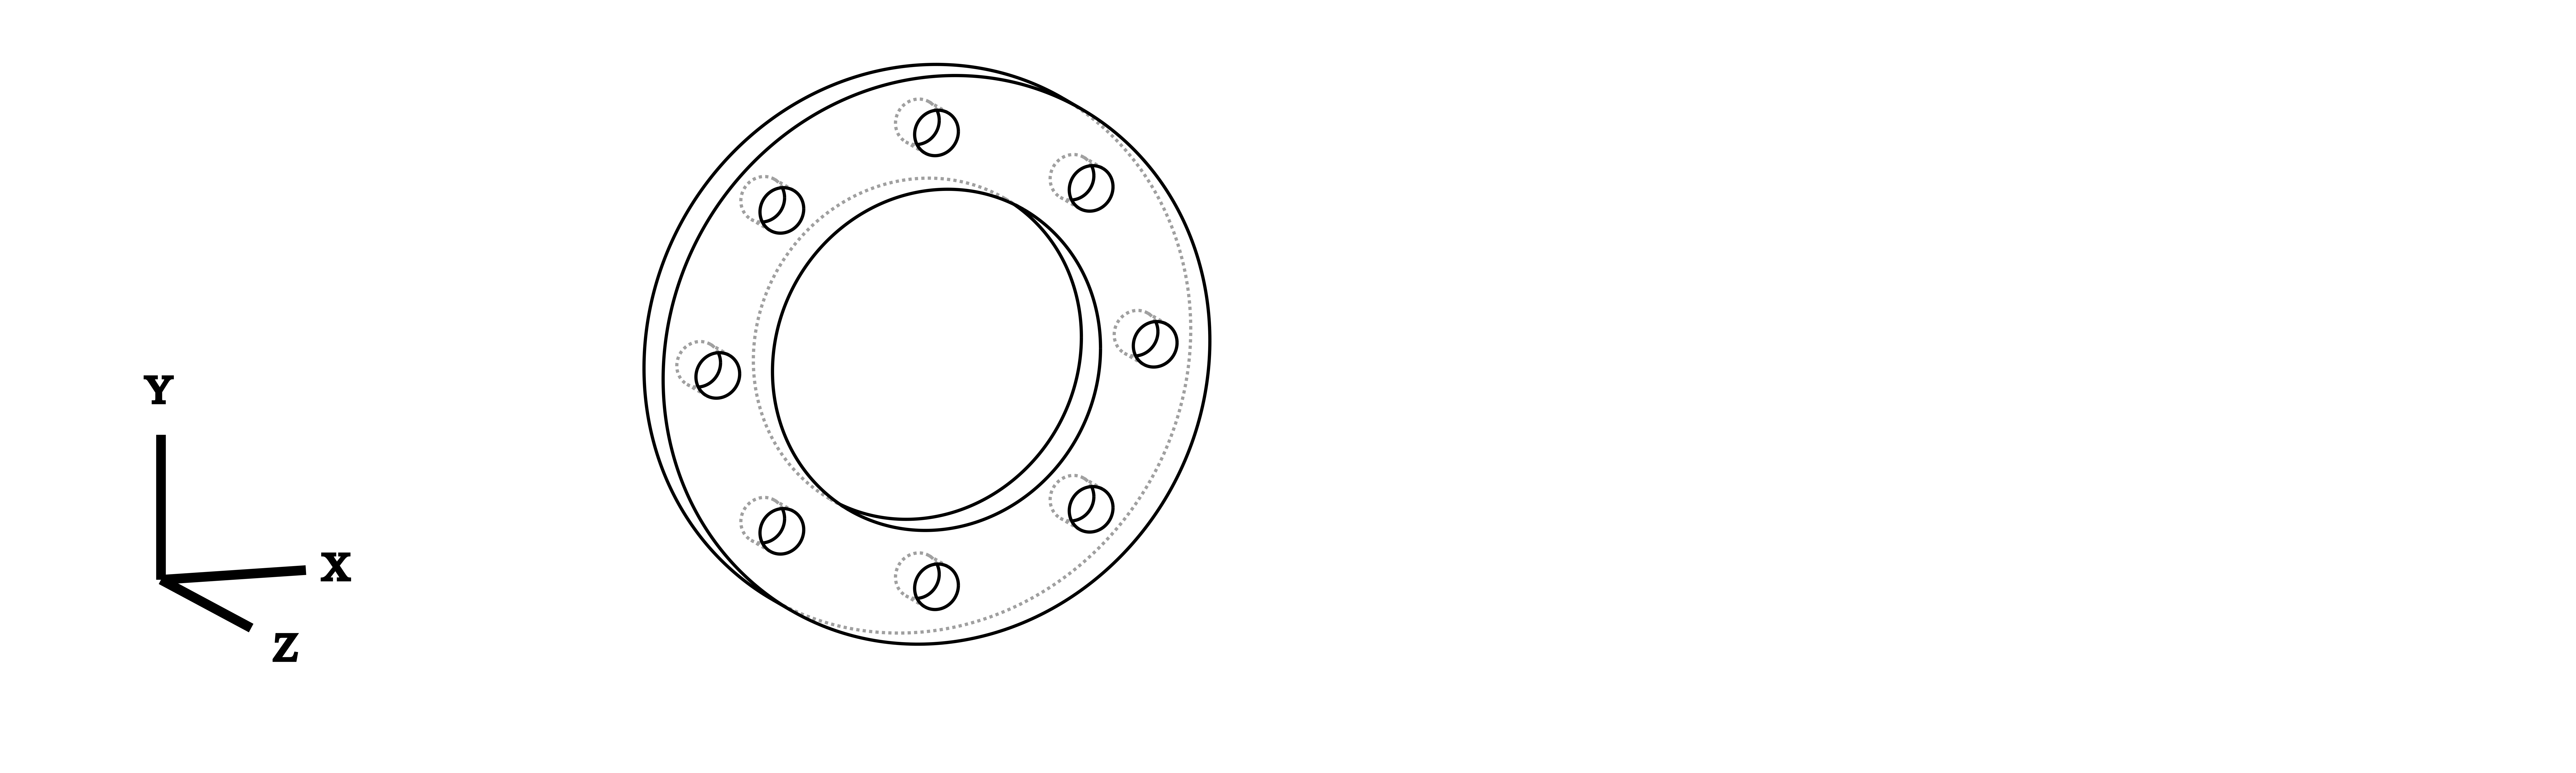

In [2]:
b2 = Brace_Circle(2, 1/2, 8)  # brace_C_02_12_08
Image(convert_to_image(b2,'./img/brace_C_02_12_08'), width=600)

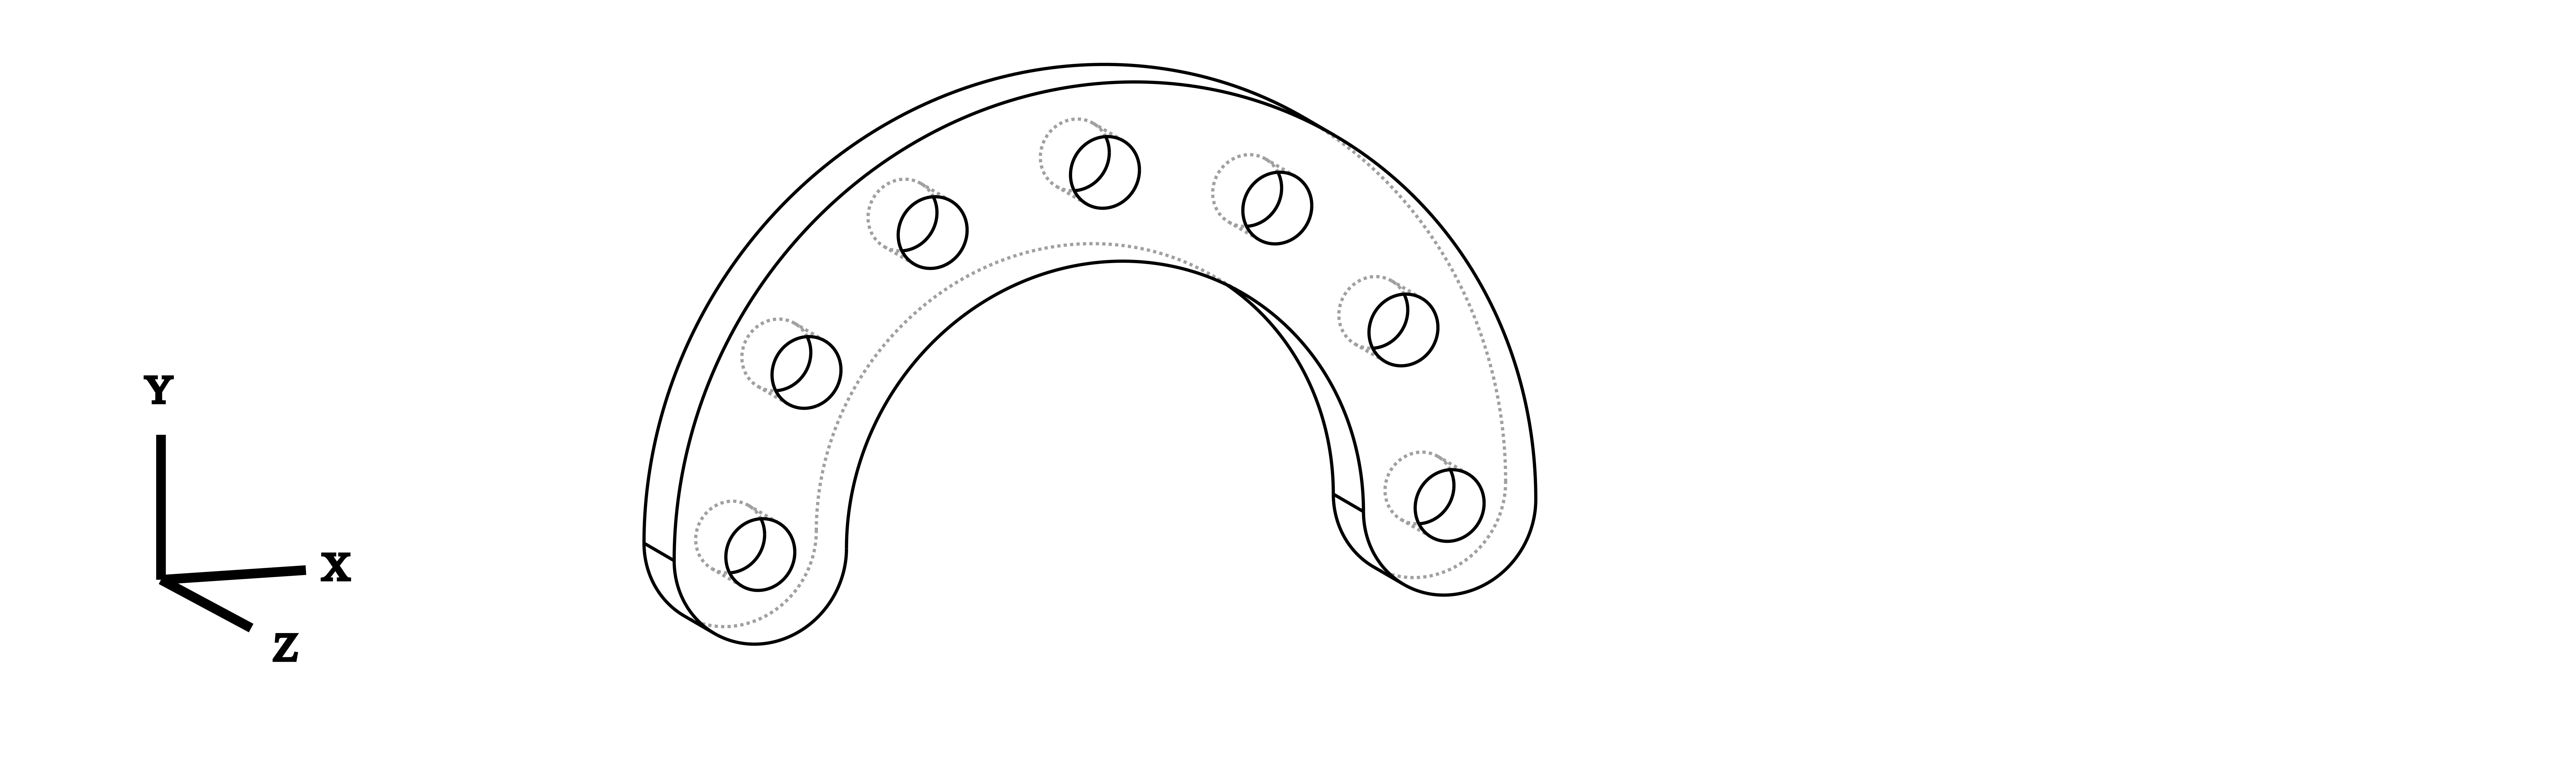

In [4]:
b3 = Brace_Arc(2,180,1/2, 7)    # brace_A_02_12_07_180
Image(convert_to_image(b3,'./img/brace_A_02_12_07_180'), width=500)

### <font color='teal'> <b> User-defined Brace configurations </b></font>

Brace with slots.

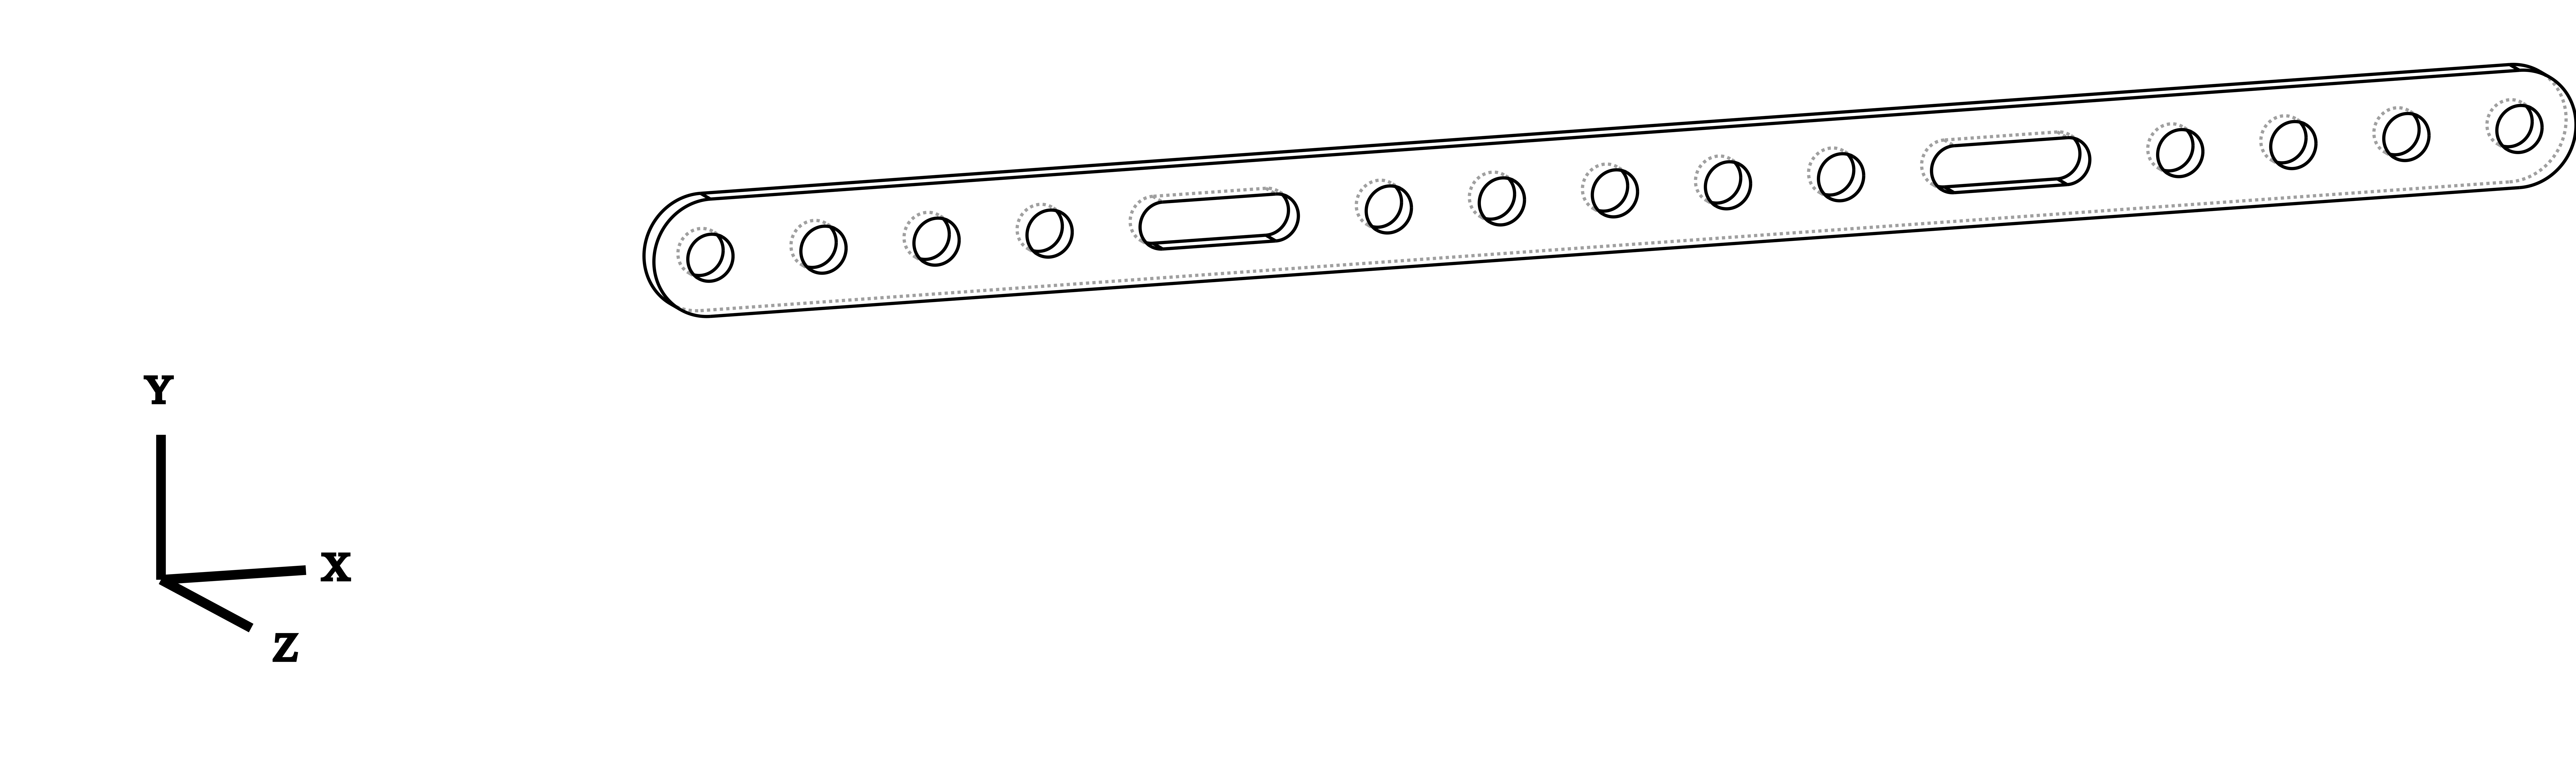

In [1]:
from lib import *

class Brace_B_17_14_13_02(Stemfie_X):
    def __init__(self):        
        b1 = Brace(17, holes=True)
        h1 = Hole_Slot(2, 1/2+1/4).BU_Tx(11)
        h2 = Hole_Slot(2, 1/2+1/4).BU_Tx(4)
        b1.D([h1, h2] )
        self.obj = b1.obj
        
b10 = Brace_B_17_14_13_02()
Image(convert_to_image(b10,'./img/brace_B_17_14_13_02'), width=600)

## <font color='purple'> <b> Calculation of the arc angle for an Brace_Arc </b></font>

Calculation of the angle for the Brace_Arc so that the end points of the arc are in multiples of BU.

**Calculation example**

* radius = 4 BU
* brace length = 7 BU

<img src="./img/comp_11.png" width="400">

**Derivation**

<img src="./img/tetiva.png" width="400">

    R    - circle radius, in BU units
    D    - chord length in BU units, D >= 2*R+1

    beta - calculated angle
    H    - calculated offset

\begin{align*}
\beta &= 2 \alpha      \\
\\
\frac{D-1}{2} &= R \cdot \sin(\alpha)    \\
\\
\beta &= 2 \alpha = 2 \cdot \arcsin \Big( \frac{D}{2R} \Big) \\
H &= R \cdot cos(\alpha) \\
\end{align*}

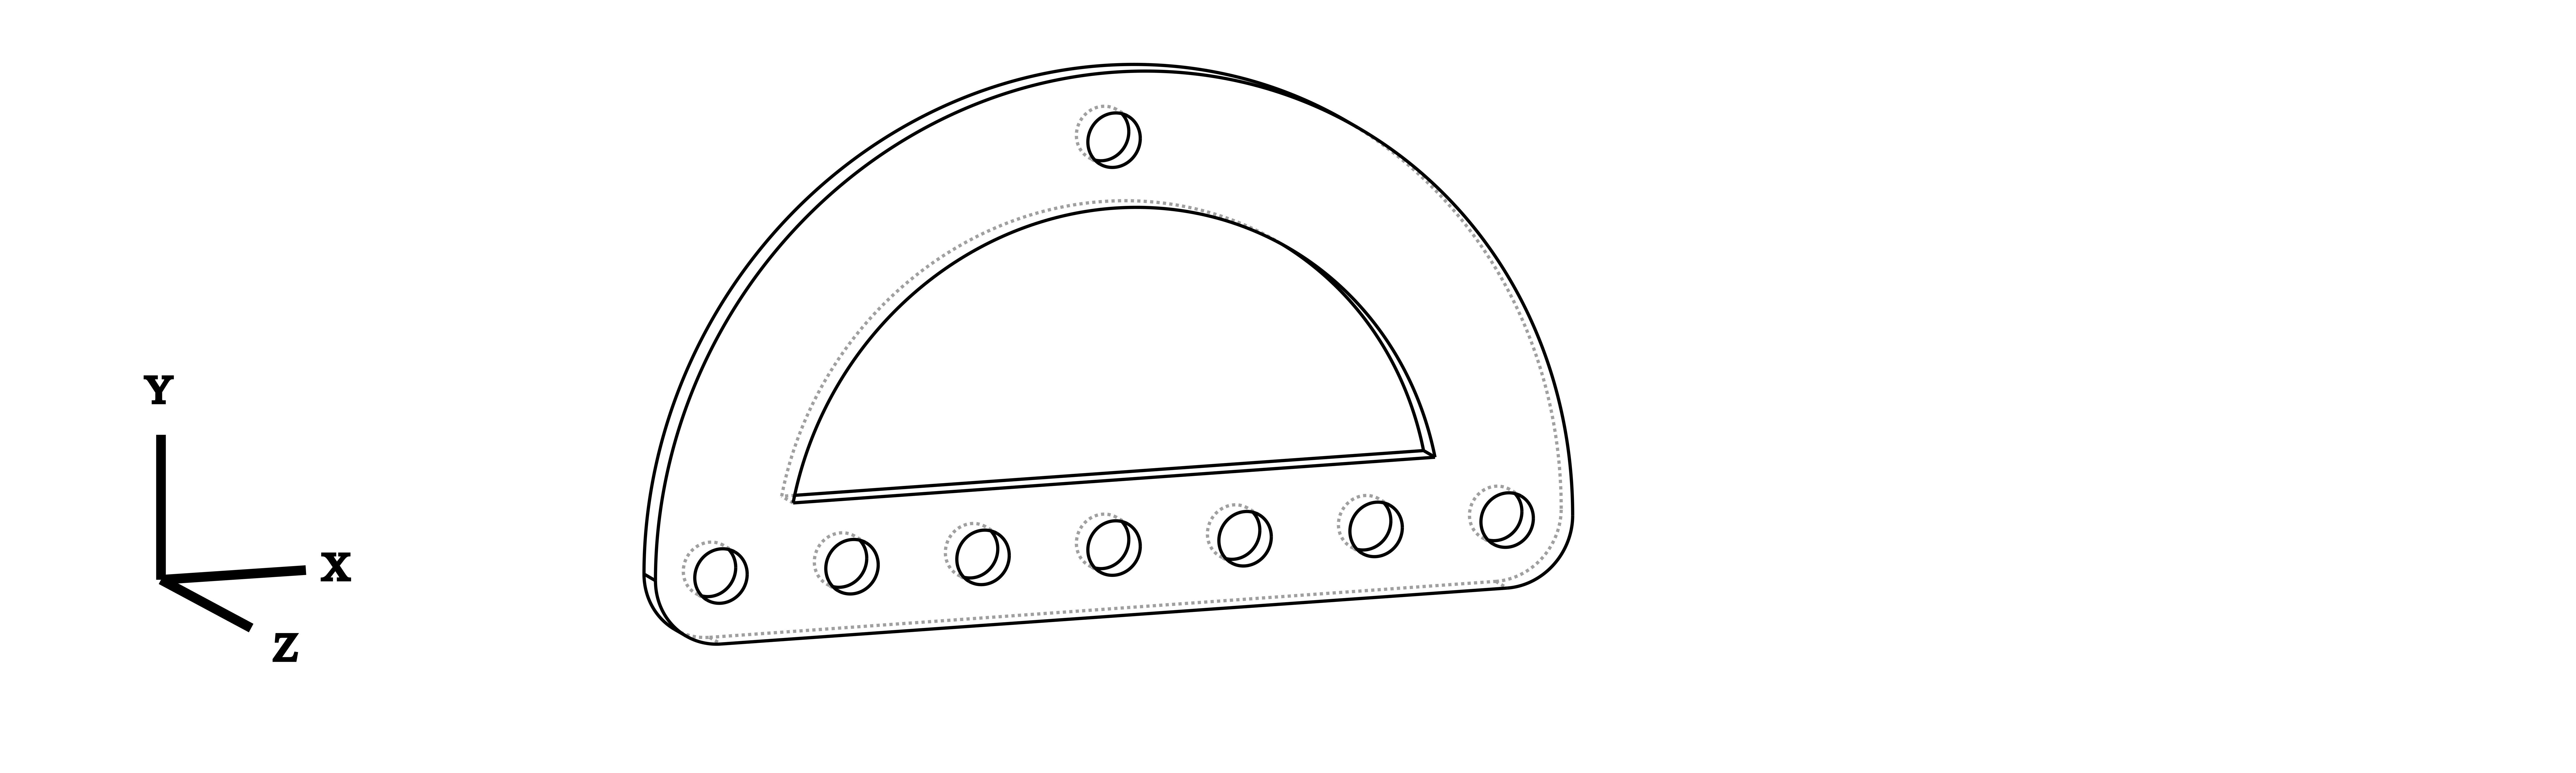

In [4]:
from lib import *
from numpy import arcsin, pi

D = 7   # D >= 2*R+1  
R = 3   # arc radius

alpha = arcsin( (D-1) / (2*R ) )
beta = 2*alpha
H = R*cos(alpha)
bdeg = beta/pi*180     # convert rad -> deg

h = R*cos(alpha)
br1 = Brace_Arc(R, bdeg, 1/4, 3, center=True).Rz(90-bdeg/2).BU_T([0, -H, 0])
bb4 = Brace(D, center=True)

br1.U(bb4)

Image(convert_to_image(br1,'./img/brace_A_02_14_03_180'), width=600)

## <font color='purple'> <b> Catalog of frequently used components </b></font>

### <font color='teal'> <b> Standard Braces </b></font>

    brace_B_XX_14
    brace_B_XX_12
    brace_B_XX_10

<img src="./img/catalog_01_braces.png" width="600">
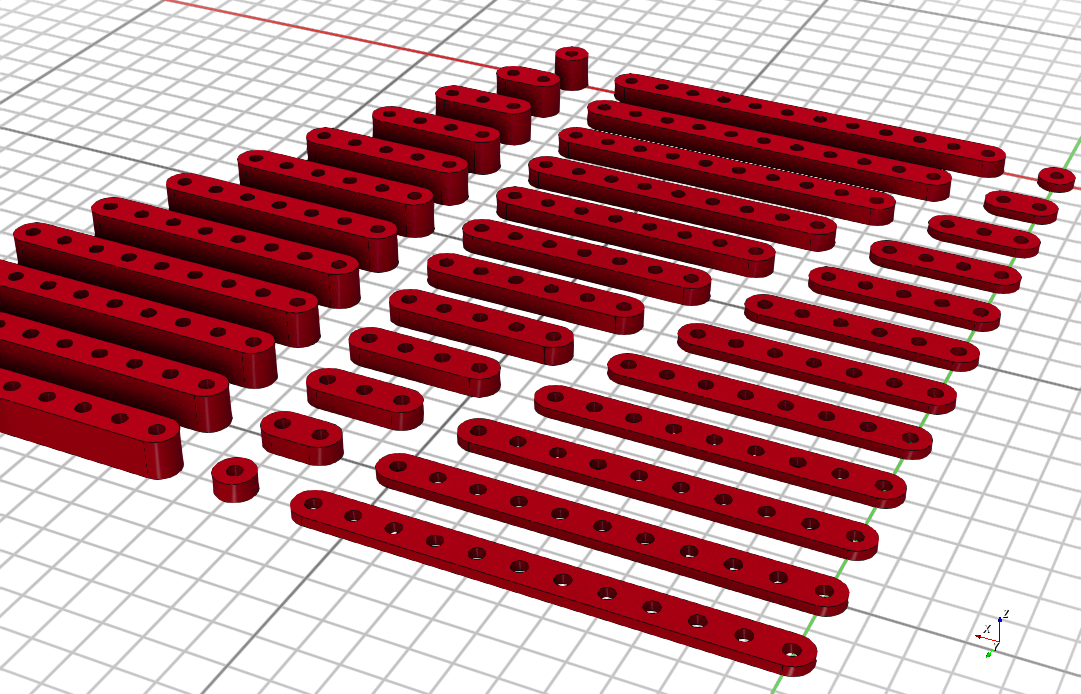

In [1]:
from lib import *
ct = Construct('./step/brace/01_braces')

for i in range(1,13):
    bb = Brace(i)
    s = 'brace_B_' + f"{i:02d}_14"
    bb.export_step('./step/brace/'+s)
    ct.add(bb, "red", [0, 2*(i-1), 0] )

for i in range(12,0,-1):
    bb = Brace(i, 1/2)
    s = 'brace_B_' + f"{i:02d}_12"
    bb.export_step('./step/brace/'+s)
    ct.add(bb, "red", [12+2 - i, 22 - 2*(i-1)  , 0] )
    
for i in range(1,13):
    bb = Brace(i,1)
    s = 'brace_B_' + f"{i:02d}_10"
    bb.export_step('./step/brace/'+s)
    ct.add(bb, "red", [15, 2*(i-1), 0] )

ct.export_step()

### <font color='teal'> <b> Braces with Slots</b></font>

    brace_B_02_14_00_01
    brace_B_03_14_00_01
    brace_B_04_14_02_01
    brace_B_05_14_02_01
    brace_B_06_14_02_02
    brace_B_07_14_03_02
    brace_B_07_14_02_01
    brace_B_08_14_02_03
    brace_B_10_14_02_04

<img src="./img/catalog_02_braces.png" width="600">

In [6]:
b02 = Brace(2, holes=False)
h02 = Hole_Slot(2, 1/2+1/4)
b02.D([h02] )
b02.export_step('brace_B_02_14_00_01')

b03 = Brace(3, holes=False)
h03 = Hole_Slot(3, 1/2+1/4)
b03.D([h03] )
b03.export_step('brace_B_03_14_00_01')

b04 = Brace(4, holes=True)
h04 = Hole_Slot(2, 1/2+1/4).BU_Tx(1)
b04.D([h04] )
b04.export_step('brace_B_04_14_02_01')

b05 = Brace(5, holes=True)
h05 = Hole_Slot(3, 1/2+1/4).BU_Tx(1)
b05.D([h05] )
b05.export_step('brace_B_05_14_02_01')

b06 = Brace(6, holes=True)
h06 = Hole_Slot(2, 1/2+1/4).BU_Tx(1)
h16 = Hole_Slot(2, 1/2+1/4).BU_Tx(3)
b06.D([h06, h16] )
b06.export_step('brace_B_06_14_02_02')

b07 = Brace(7, holes=True)
h07 = Hole_Slot(2, 1/2+1/4).BU_Tx(1)
h17 = Hole_Slot(2, 1/2+1/4).BU_Tx(4)
b07.D([h07, h17] )
b07.export_step('brace_B_07_14_03_02')

b77 = Brace(7, holes=True)
h27 = Hole_Slot(5, 1/2+1/4).BU_Tx(1)
b77.D([h27] )
b77.export_step('brace_B_07_14_02_01')

b08 = Brace(8, holes=True)
h08 = Hole_Slot(2, 1/2+1/4).BU_Tx(1)
h18 = Hole_Slot(2, 1/2+1/4).BU_Tx(3)
h28 = Hole_Slot(2, 1/2+1/4).BU_Tx(5)
b08.D([h08,h18,h28] )
b08.export_step('brace_B_08_14_02_03')

b10 = Brace(10, holes=True)
h10 = Hole_Slot(2, 1/2+1/4).BU_Tx(1)
h11 = Hole_Slot(2, 1/2+1/4).BU_Tx(3)
h12 = Hole_Slot(2, 1/2+1/4).BU_Tx(5)
h13 = Hole_Slot(2, 1/2+1/4).BU_Tx(7)
b10.D([h10,h11,h12,h13] )
b10.export_step('brace_B_10_14_02_04')

ct = Construct('./step/brace/02_braces')
ct.add(b02, "red", [0, 0, 0] )
ct.add(b03, "red", [0, 2, 0] )
ct.add(b04, "red", [0, 4, 0] )
ct.add(b05, "red", [0, 6, 0] )
ct.add(b06, "red", [0, 8, 0] )
ct.add(b07, "red", [0, 10, 0] )
ct.add(b77, "red", [0, 12, 0] )
ct.add(b08, "red", [0, 14, 0] )
ct.add(b10, "red", [0, 16, 0] )
ct.export_step()

<img src="./img//demo/banner_02.png" width="800">